# K NEAREST NEIGHBORS

### Import libraries

In [1]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### Import the dataset

In [2]:
df = pd.read_csv('teleCust.csv') # Telecom customer dataset
# The target field, called custcat, has four possible values that correspond to the four customer groups, as follows:
#  1- Basic Service 2- E-Service 3- Plus Service 4- Total Service

### Dataset Analysis


In [3]:
print(df.head()) # Check the dataset header
df.info()

   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 no

In [4]:
df.drop(["ed","employ"], axis = 1, inplace = True) # Dropping columns

### Exploratory Data Analysis

<Axes: >

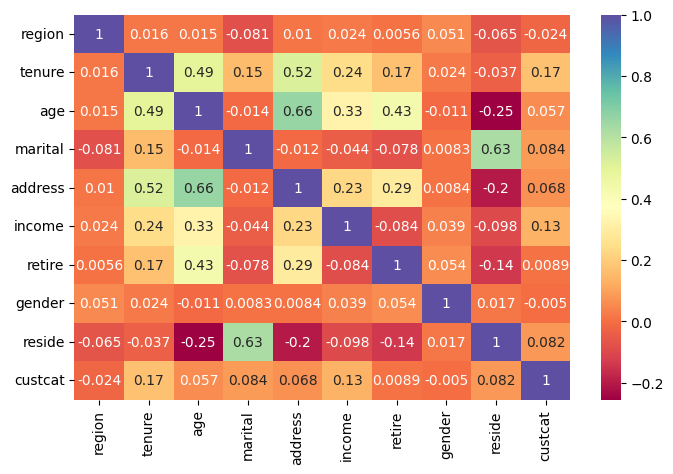

In [5]:
plt.figure(figsize = (8, 5))
sns.heatmap(df.corr(), annot=True, cmap = 'Spectral')

In [6]:
df.drop(["retire","gender"], axis = 1, inplace = True) # Dropping columns with low correlation

### Getting dummies and including them in the df

In [7]:
region = pd.get_dummies(df['region'], drop_first=True, prefix='region')
reside = pd.get_dummies(df['reside'], drop_first=True, prefix='reside')
df.drop(["region","reside"], axis = 1, inplace = True)
df = pd.concat([df, region, reside], axis = 1)

### Standardization of variables

In [8]:
scaled_variables = df[['tenure','age','address','income']]
scaler = StandardScaler()
scaler.fit(scaled_variables)
scaled_variables = scaler.transform(scaled_variables)
df_scaled = pd.DataFrame(scaled_variables, columns = ['tenure','age', 'address', 'income']) #Turn scaled variables into a df
df.drop(['tenure','age', 'address', 'income'], axis = 1, inplace = True) # Drop old variables
df = pd.concat([df, df_scaled], axis=1) # Add scaled variables

## KNN MODEL

In [9]:
y = df['custcat']                       # This is the target
x = df.drop(['custcat'], axis = 1)      # 

### Splitting data

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

### Instantiate the model

In [11]:
k = 9 # test with other values
knn_model = KNeighborsClassifier(n_neighbors=k)

### Training the model

In [12]:
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=9)

### Predicting values

In [13]:
Y_pred = knn_model.predict(X_test)

### Reports

In [14]:
print("Accuracy Score: ",metrics.accuracy_score(Y_test, Y_pred))

Accuracy Score:  0.34
